<a href="https://colab.research.google.com/github/SiSmog/Traffic-Sign-Image-Classification-Deep-Learning/blob/main/trafficsignclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!echo '{"username":"majdirekik","key":"e25ee4342bc46b1a2346ee7ceb7e08c1"}' > kaggle.json

In [ ]:
!sudo mkdir -p /root/.kaggle
!sudo mv ./kaggle.json /root/.kaggle/


In [ ]:
!cat ./kaggle.json

cat: ./kaggle.json: No such file or directory


In [ ]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

 91% 172M/190M [00:01<00:00, 131MB/s]
100% 190M/190M [00:01<00:00, 132MB/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


In [ ]:
!unzip /content/traffic-sign-dataset-classification.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_Data/DATA/26/026_0001.png  
  inflating: traffic_Data/DATA/26/026_0002.png  
  inflating: traffic_Data/DATA/26/026_0003.png  
  inflating: traffic_Data/DATA/26/026_0004.png  
  inflating: traffic_Data/DATA/26/026_0005.png  
  inflating: traffic_Data/DATA/26/026_0006.png  
  inflating: traff

In [ ]:
# get class names
class_path = './labels.csv'
classes = pd.read_csv(class_path)
class_names = list(classes['Name'])
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Fences', 'Heavy Vehicle Accidents'

In [ ]:
data_dir = './traffic_Data/DATA'
num_images = pd.DataFrame(class_names, columns=['label'])

In [ ]:
count = []
for dir in os.listdir(data_dir):
    count.append(len(os.listdir(data_dir + '/' + dir)))
num_images['count'] = count
num_images.head()

,label,count
0,Speed limit (5km/h),150
1,Speed limit (15km/h),446
2,Speed limit (30km/h),162
3,Speed limit (40km/h),260
4,Speed limit (50km/h),18


In [ ]:
num_images.label.value_counts()


Bicycles crossing               2
Speed limit (40km/h)            2
Speed limit (50km/h)            2
Go left or straight             1
Road Divider                    1
Traffic signals                 1
Danger Ahead                    1
Zebra Crossing                  1
Children crossing               1
Dangerous curve to the left     1
Dangerous curve to the right    1
Unknown1                        1
Unknown2                        1
Unknown3                        1
Go right or straight            1
Speed limit (5km/h)             1
Unknown4                        1
Uturn                           1
Train Crossing                  1
Under Construction              1
Unknown5                        1
Fences                          1
Heavy Vehicle Accidents         1
Unknown6                        1
Give Way                        1
No stopping                     1
No entry                        1
Unknown7                        1
ZigZag Curve                    1
Horn          

In [ ]:
datagen = ImageDataGenerator(rescale = 1.0/255, validation_split=0.2)


In [ ]:
BATCH_SIZE = 32
train_gen = datagen.flow_from_directory(data_dir, class_mode='categorical', subset='training', batch_size=BATCH_SIZE)
test_gen = datagen.flow_from_directory(data_dir, class_mode='categorical', subset='validation', batch_size=BATCH_SIZE, shuffle=False)

Found 3359 images belonging to 58 classes.
Found 811 images belonging to 58 classes.


In [ ]:
train_images = train_gen.samples
test_images = test_gen.samples

In [ ]:
batchX, batchY = train_gen.next()
print('train batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
batchX, batchY = test_gen.next()
print('test batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
input_shape = batchX.shape[1:]

train batch shape=(32, 256, 256, 3), min=0.000, max=1.000
test batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


In [ ]:
pretrained_base=Xception(include_top=False, input_shape = input_shape, pooling='avg', weights="imagenet")
pretrained_base.trainable=False
model = Sequential(
    [
    pretrained_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(len(class_names), activation='softmax')
    ]
)
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
history = model.fit_generator(steps_per_epoch=train_images/BATCH_SIZE, generator=train_gen, validation_data= test_gen, 
                           validation_steps=test_images/BATCH_SIZE, epochs=10)

Epoch 1/10


<ipython-input-17-e228c5636fc2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(steps_per_epoch=train_images/BATCH_SIZE, generator=train_gen, validation_data= test_gen,


104/104 [==============================] - 38s 233ms/step - loss: 1.5432 - accuracy: 0.6353 - val_loss: 0.6940 - val_accuracy: 0.8459
Epoch 2/10
104/104 [==============================] - 21s 203ms/step - loss: 0.4138 - accuracy: 0.9065 - val_loss: 0.3133 - val_accuracy: 0.9396
Epoch 3/10
104/104 [==============================] - 21s 200ms/step - loss: 0.2007 - accuracy: 0.9601 - val_loss: 0.1673 - val_accuracy: 0.9766
Epoch 4/10
104/104 [==============================] - 21s 201ms/step - loss: 0.1076 - accuracy: 0.9806 - val_loss: 0.0931 - val_accuracy: 0.9901
Epoch 5/10
104/104 [==============================] - 21s 198ms/step - loss: 0.0694 - accuracy: 0.9914 - val_loss: 0.0546 - val_accuracy: 0.9975
Epoch 6/10
104/104 [==============================] - 22s 207ms/step - loss: 0.0418 - accuracy: 0.9955 - val_loss: 0.0372 - val_accuracy: 1.0000
Epoch 7/10
104/104 [==============================] - 21s 200ms/step - loss: 0.0311 - accuracy: 0.9973 - val_loss: 0.0279 - val_accuracy: 0.9

1/1 [==============================] - 0s 24ms/step


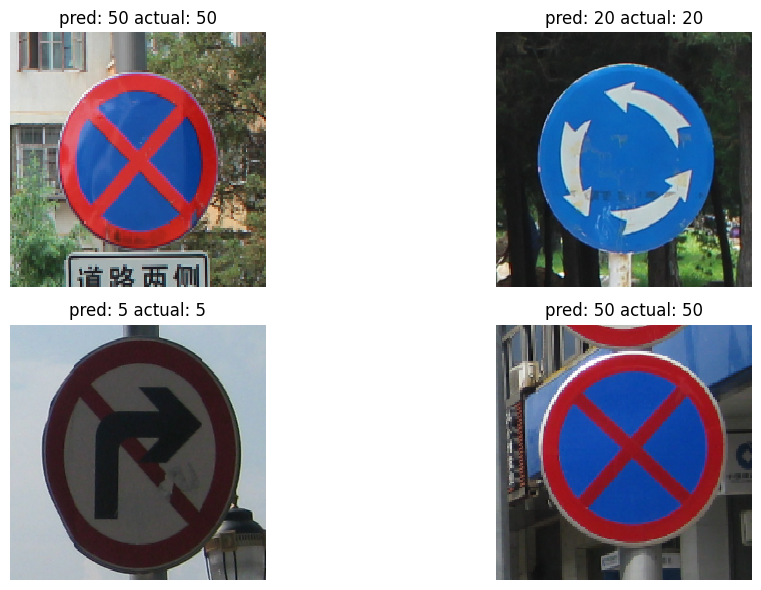

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

images = [test_gen[random.randint(0,24)],test_gen[random.randint(0,24)],test_gen[random.randint(0,24)],test_gen[random.randint(0,24)],]

# Display images with titles using matplotlib
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    prediction= model.predict(np.array([images[i][0][0]]))
    result=np.argmax(prediction)
    actual=np.argmax(images[i][1][0])
    ax.imshow(images[i][0][0])
    ax.set_title("pred: "+str(result)+" actual: "+ str(actual))
    ax.axis('off')
plt.tight_layout()
plt.show()
